<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی برق
</font>
<br>
<font color=green>
مقدمه ای بر یادگیری ماشین - دکتر گلستانی
</font>
<br>
ترم اول سال تحصیلی 1400-1401
<br>
امیرحسین صفری
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>تمرین کامپیوتری سری دوم</div>
</font>
<hr>
</font></div>


<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>


In [1]:
# change directory to MyDrive/CHW2
from google.colab import drive 
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_CHWs/CHW2/

Mounted at /content/drive
/content/drive/MyDrive/ML_CHWs/CHW2


## Problem C3: Linear Classification & Decision Trees

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint

### A. Load Data

In [3]:
# load data_banknote_authentication.csv with pandas
banknote_data = pd.read_csv (r'data_banknote_authentication.csv')  
print (banknote_data)

      feature 1  feature 2  feature 3  feature 4  label
0       -1.7104   -4.77800   6.210900    0.39740      1
1        3.7635    2.78110   0.661190    0.34179      1
2        5.3915    9.99460  -3.808100   -3.36420     -1
3       -1.8343   -6.59070   5.642900    0.54998      1
4        3.5358    6.70860  -0.818570    0.47886      1
...         ...        ...        ...        ...    ...
1367     3.8584    0.78425   1.103300    1.70080      1
1368     4.6689    1.30980   0.055404    1.90900      1
1369    -3.6053   -5.97400  10.091600   -0.82846     -1
1370     2.0421    1.24360   4.217100    0.90429      1
1371     1.9476   -4.77380   8.527000   -1.86680     -1

[1372 rows x 5 columns]


In [4]:
# convert pandas dataframe to numpy array for other operation:
banknote_data = banknote_data.to_numpy()

In [5]:
# split the data
X = banknote_data[:, 0:4].T
Y = banknote_data[:, 4].T

X_train = X[:, 0:np.int(np.ceil(0.8*X.shape[1]))]
Y_train = Y[0:np.int(np.ceil(0.8*Y.shape[0]))]

X_test = X[:, np.int(np.ceil(0.8*X.shape[1])):]
Y_test = Y[np.int(np.ceil(0.8*Y.shape[0])):]
X_train

array([[ -1.7104 ,   3.7635 ,   5.3915 , ...,  -0.49241,   2.6415 ,
         -2.6649 ],
       [ -4.778  ,   2.7811 ,   9.9946 , ...,   0.89392,   7.586  ,
        -12.813  ],
       [  6.2109 ,   0.66119,  -3.8081 , ...,  -1.6283 ,  -0.28562,
         12.6689 ],
       [  0.3974 ,   0.34179,  -3.3642 , ...,  -0.56854,  -1.6677 ,
         -1.9082 ]])

### B. Perceptron Algorithm

In [6]:
# padding X_training and X_test with 1 for each data point
one_mat_train = np.ones((1, X_train.shape[1]))
X_train_homogenous = np.vstack((one_mat_train, X_train))

one_mat_test = np.ones((1, X_test.shape[1]))
X_test_homogenous = np.vstack((one_mat_test, X_test))

The reason of adding 1 to any data point is that by taking the data space up to a higher dimension, we can build a linear relationship between X and Y.

In [84]:
def perceptron(X_tr, Y_tr, X_te, Y_te, max_iter=50000):
    W = np.zeros(X_tr.shape[0])
    test_loss_history = []
    train_loss_history = []
    training_size = X_tr.shape[1]
    test_size = X_te.shape[1]

    # find best weights(W)
    for i in range(max_iter):
        # find violating_points:
        t = Y_tr * np.dot(W, X_tr)
        if(i == 0): # in initial state all data points are violating
            violating_index = range(0, X_tr.shape[1])
        else:
            violating_index = np.where(t < 0)[0]

        # find loss for test data:
        violating_test = np.where(Y_te * np.dot(W, X_te) < 0)[0]
        test_loss = (1/test_size)*len(violating_test)
        train_loss = (1/training_size)*len(violating_index)
        if (i+1) % 500 == 0 or i == 0:
            test_loss_history.append(test_loss)
            train_loss_history.append(train_loss)
            
        # find random violating point for updating W
        if(len(violating_index) == 0): # if train loss = 0 not change W
            W = W
        else:
            random_int = randint(len(violating_index))
            random_violate_index = violating_index[random_int]
            W = W + Y_tr[random_violate_index]*X_tr[:, random_violate_index]

    return W, train_loss_history,test_loss_history

W_final, train_loss_history, test_loss_history = perceptron(X_train_homogenous, Y_train, X_test_homogenous, Y_test)

[]

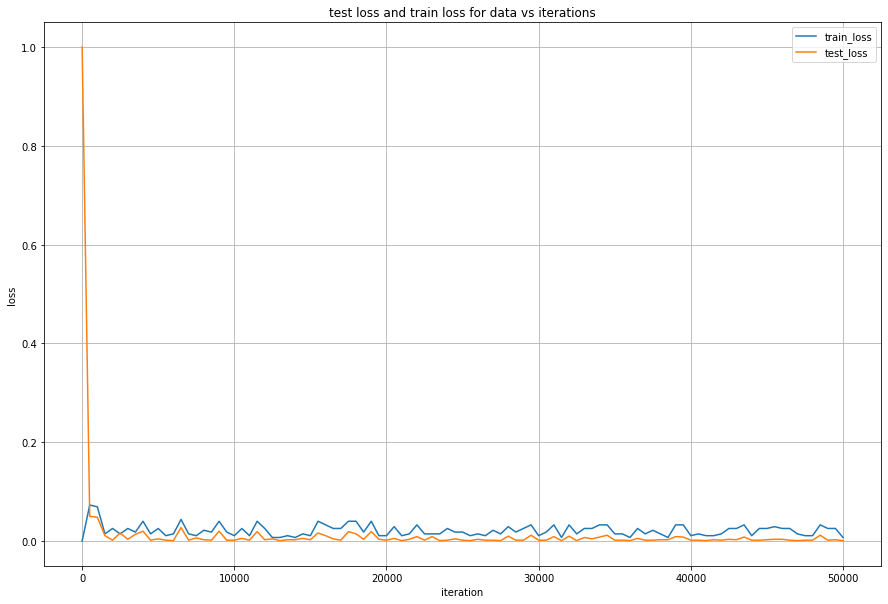

In [92]:
# plot figures:
plt.figure(figsize=(15,10))
plt.plot(range(0,50001,500), test_loss_history)
plt.plot(range(0,50001,500), train_loss_history)
plt.title('test loss and train loss for data vs iterations')
plt.legend({'test_loss', 'train_loss'})
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.plot()

Since this algorithm chooses one random point to update the weights from the violating points, it is possible to make a slightly difference in final erros and weights in each run.

In [93]:
final_error = test_loss_history[-1]
final_weights = W_final
print(f'final test data error = {final_error}')
print(f'final weights = {final_weights}')

final test data error = 0.0072992700729927005
final weights = [ 552.          263.5944148  -135.12593088   26.799365   1557.6735454 ]


### C. Generalize to non-linear classification



In [94]:
# apply non linear function to train and test data
new_feature_tr = X_train_homogenous[-1,:] ** 3
si_train_homogenous = np.vstack((X_train_homogenous, new_feature_tr))

new_feature_te = X_test_homogenous[-1,:] ** 3
si_test_homogenous = np.vstack((X_test_homogenous, new_feature_te))

W_new_final, train_new_loss_history, test_new_loss_history = perceptron(si_train_homogenous, Y_train, si_test_homogenous, Y_test)

[]

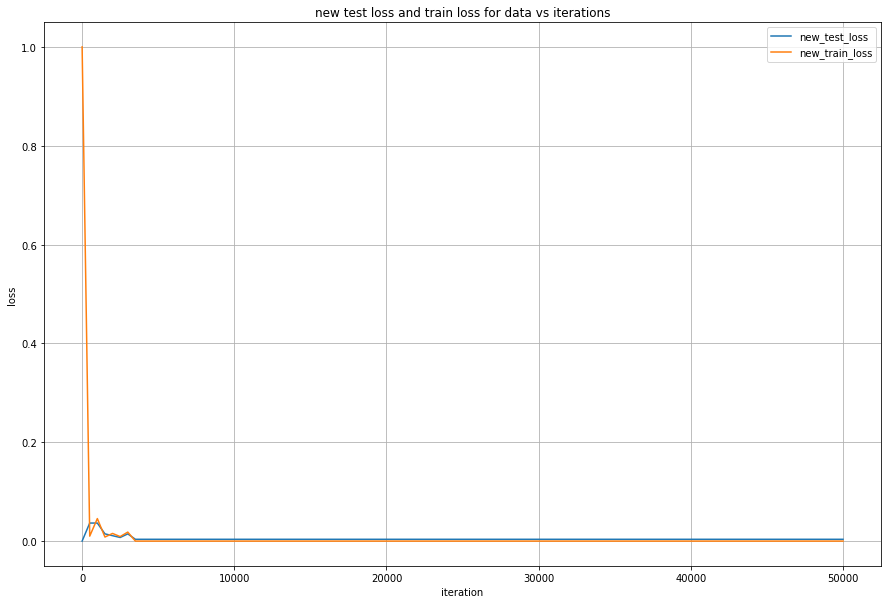

In [95]:
# plot figures:
plt.figure(figsize=(15,10))
plt.plot(range(0,50001,500), test_new_loss_history)
plt.plot(range(0,50001,500), train_new_loss_history)
plt.title('new test loss and train loss for data vs iterations')
plt.legend({'new_test_loss', 'new_train_loss'})
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.plot()

In [98]:
new_final_error = test_new_loss_history[-1]
new_final_weights = W_new_final
print(f'new final test data error = {new_final_error}')
print(f'new final weights = {new_final_weights}')

new final test data error = 0.0036496350364963502
new final weights = [117.          64.69946    -37.487036     9.374189   306.192031
  56.05119909]


### D. SVM algorithm


In [101]:
from sklearn import svm
clf = svm.SVC(kernel='linear')  # set kernel to linear
clf.fit(X_train.T, Y_train)  # train model
clf.predict(X_test.T)

Y_train_predict = clf.predict(X_train.T)
Y_test_predict = clf.predict(X_test.T)

emp_loss = np.sum(Y_train_predict != Y_train) / X_train.shape[1]
true_loss = np.sum(Y_test_predict != Y_test) / X_test.shape[1]
svm_weights = list(np.hstack([clf.intercept_[0],clf.coef_[0]]))

print(f'empirical_risk = {emp_loss}\n')
print(f'true_risk = {true_loss}\n')
print(f'final weights = {svm_weights} \nin other words b = {svm_weights[0]} and w = {svm_weights[1:5]}\n')


empirical_risk = 0.0036429872495446266

true_risk = 0.01824817518248175

final weights = [1.9461069432622604, 1.0882087646835625, -0.5231184074770354, 0.21277062136792546, 5.961809629779625] 
in other words b = 1.9461069432622604 and w = [1.0882087646835625, -0.5231184074770354, 0.21277062136792546, 5.961809629779625]



### E. Conclusion

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=1>
<div align=right>
<font face="B Nazanin" size=5>
<p></p>
با توجه به نتایج به دست آمده مقدار خطا روی داده های تست به ترتیب در روش اول ، روش دوم (مپ کردن به داده ی غیر خطی ) و روش سوم برابر با 0.007 ، 0.004 و 0.018 می شود
<br>
هم چنین با توجه به نمودار ها خطای داده ی یادگیری در روش دوم بسیار سریع تر از روش اول برابر با صفر شد که نشاندهنده ی این نکته است که افزودن ویژگی جدید به داده ها باعث طبقه بندی بهتر داده ها می شود که البته باعث ایجاد خطای کمتر هم روی داده های تست نسبت به روش اول بوده است 
</div>

## Problem C4: Decision Trees

### A. Load Data

In [ ]:
# load data_banknote_authentication.csv with pandas
mushrooms_data = pd.read_csv (r'mushrooms.csv')  
print(mushrooms_data)

      class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0         1          5            2  ...                  2           3        5
1         0          5            2  ...                  3           2        1
2         0          0            2  ...                  3           2        3
3         1          5            3  ...                  2           3        5
4         0          5            2  ...                  3           0        1
...     ...        ...          ...  ...                ...         ...      ...
8119      0          3            2  ...                  0           1        2
8120      0          5            2  ...                  0           4        2
8121      0          2            2  ...                  0           1        2
8122      1          3            3  ...                  7           4        2
8123      0          5            2  ...                  4           1        2

[8124 rows x 23 columns]


In [ ]:
# convert pandas dataframe to numpy array for other operation:
mushrooms_data = mushrooms_data.to_numpy()

In [ ]:
# split the data
X = mushrooms_data[:, 1:23].T
Y = mushrooms_data[:, 0].T

X_train = X[:, 0:int(np.ceil(0.7*X.shape[1]))]
Y_train = Y[0:int(np.ceil(0.7*Y.shape[0]))]

X_verification = X[:, int(np.ceil(0.7*X.shape[1])): int(np.ceil(0.9*X.shape[1]))]
Y_verification = Y[int(np.ceil(0.7*Y.shape[0])): int(np.ceil(0.9*Y.shape[0]))]

X_test = X[:, int(np.ceil(0.9*X.shape[1])):]
Y_test = Y[int(np.ceil(0.9*Y.shape[0])): ]


### B. Train Desicion Tree

In [ ]:
from sklearn import tree

depth_tree =[4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20]
train_loss_history = []
verification_loss_history = []
test_loss_history = []

for d in depth_tree:
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X_train.T, Y_train.T)

    Y_train_predict = clf.predict(X_train.T)
    Y_verification_predict = clf.predict(X_verification.T)
    Y_test_predict = clf.predict(X_test.T)

    train_loss = np.sum(Y_train_predict != Y_train) / X_train.shape[1]
    verification_loss = np.sum(Y_verification_predict != Y_verification) / X_verification.shape[1]
    test_loss = np.sum(Y_test_predict != Y_test) / X_test.shape[1]

    train_loss_history.append(emp_loss)
    verification_loss_history.append(verification_loss)
    test_loss_history.append(test_loss)


    

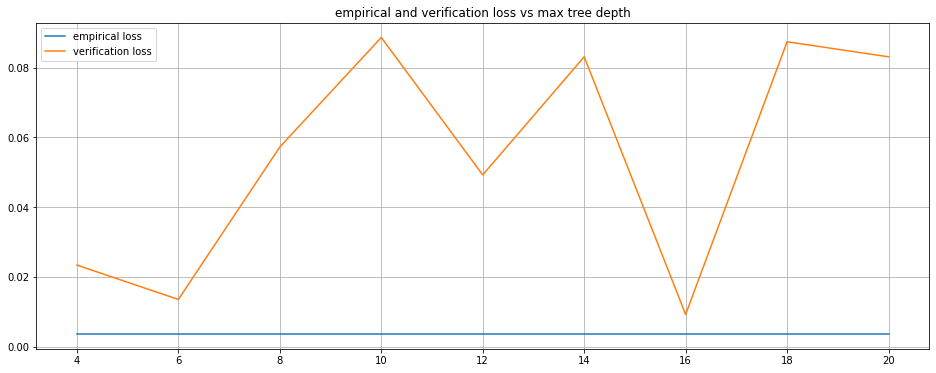

In [ ]:
# plot figures:
plt.figure(figsize=(16, 6))
plt.title("empirical and verification loss vs max tree depth",fontsize='large')
plt.plot(depth_tree,  train_loss_history)
plt.plot(depth_tree, verification_loss_history)
plt.legend(['empirical loss','verification loss'])
plt.grid(True)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=1>
<div align=right>
<font face="B Nazanin" size=5>
<p></p>
در وهله ی اول که نمودار فوق با مجدد اجرا کردن کد ، همواره دستخوش تغییر می شود که احتمال می رود این اتفاق به دلیل کم بودن تعداد داده های یادگیری باشند اما با توجه به نمودار فوق به توضیحات زیر می پردازیم
<br>
اولا که به ازای تمام عمق ها خطای یادگیری برابر با صفر می شود اما با توجه اینکه خطای اعتبار سنجی بایستی مدنظر ما قرار گیرد ، به ازای حداکثر عمق 16 ، این  
خطا به کمینه ی خودش رسیده است
و لذا مقدار خطا روی داده ی تست به ازای حداکثر عمق 14 را در ادامه گزارش می کنیم 
</div>

In [ ]:
print(f'loss on test data for maximum depth = 14 equals {test_loss_history[6]}')

loss on test data for maximum depth = 14 equals 0.04064039408866995
